In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('Wine quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

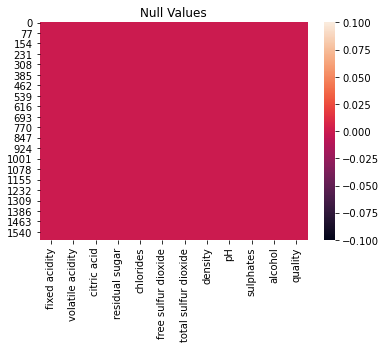

In [8]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the dataset.

# Checking for Correlation

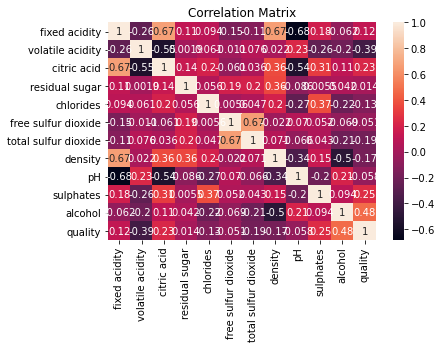

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# Checking for outliers

<function matplotlib.pyplot.show(*args, **kw)>

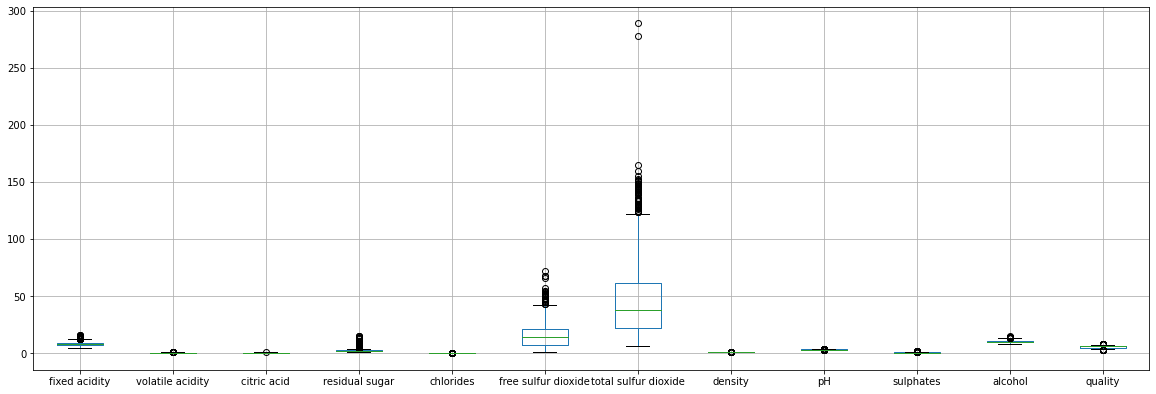

In [11]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show

In [12]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [13]:
df.new=df[(z<3).all(axis=1)]

In [14]:
df.new.shape

(1451, 12)

In [15]:
df=df.new

In [16]:
x=df.drop('quality', axis =1)
y=df['quality']

In [17]:
x.shape

(1451, 11)

In [18]:
y.shape

(1451,)

In [19]:
x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform
x.new=power_transform(x)

x.new=pd.DataFrame(x.new,columns=x.columns)

In [21]:
x.new.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

In [22]:
x=x.new

In [23]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR=LogisticRegression 
    LR.fit(x_train, y_train)
    predlr=LR.predict(x_test) 
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

TypeError: fit() missing 1 required positional argument: 'y'

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=130)

In [25]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6238532110091743
[[  0   6   3   0   0]
 [  0 141  43   1   0]
 [  1  64 109  10   0]
 [  0   4  25  22   0]
 [  0   0   3   4   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.66      0.76      0.70       185
           6       0.60      0.59      0.59       184
           7       0.59      0.43      0.50        51
           8       0.00      0.00      0.00         7

    accuracy                           0.62       436
   macro avg       0.37      0.36      0.36       436
weighted avg       0.60      0.62      0.61       436



In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6422018348623854
[[  3   4   2   0   0]
 [  5 132  44   4   0]
 [  3  49 117  13   2]
 [  0   9  12  27   3]
 [  0   1   1   4   1]]
              precision    recall  f1-score   support

           4       0.27      0.33      0.30         9
           5       0.68      0.71      0.69       185
           6       0.66      0.64      0.65       184
           7       0.56      0.53      0.55        51
           8       0.17      0.14      0.15         7

    accuracy                           0.64       436
   macro avg       0.47      0.47      0.47       436
weighted avg       0.64      0.64      0.64       436



In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7018348623853211
[[  0   5   4   0   0]
 [  0 152  32   1   0]
 [  0  49 126   9   0]
 [  0   6  18  27   0]
 [  0   0   3   3   1]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.72      0.82      0.77       185
           6       0.69      0.68      0.69       184
           7       0.68      0.53      0.59        51
           8       1.00      0.14      0.25         7

    accuracy                           0.70       436
   macro avg       0.62      0.44      0.46       436
weighted avg       0.69      0.70      0.69       436



In [28]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.6215596330275229
[[  0   8   1   0   0]
 [  0 147  36   2   0]
 [  0  73 104   7   0]
 [  0   6  25  20   0]
 [  0   0   3   4   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.63      0.79      0.70       185
           6       0.62      0.57      0.59       184
           7       0.61      0.39      0.48        51
           8       0.00      0.00      0.00         7

    accuracy                           0.62       436
   macro avg       0.37      0.35      0.35       436
weighted avg       0.60      0.62      0.60       436



In [29]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.5693044199549708


In [30]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.4610569972745586


In [31]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.5885792155468657


In [32]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.5706766204526603


# Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [35]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [36]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [37]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 14}

In [38]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [39]:
accuracy_score(y_test,GCV_pred)

0.6284403669724771

In [40]:
import joblib
joblib.dump(GCV.best_estimator_,'Wine_quality.pkl')

['Wine_quality.pkl']